In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_mutation_df = pd.read_csv('data/transmutation_df.csv')
delta_correlation_df = pd.read_csv('data/delta_correlation_df.csv')

In [3]:
delta_correlation_df = delta_correlation_df[delta_correlation_df.FDR < 0.05]
delta_correlation_df = delta_correlation_df[['Gene', 'Cancer', 'Delta_Correlation']]
trans_mutation_df = trans_mutation_df.drop(columns = 'Delta_Correlation')
trans_df = pd.merge(trans_mutation_df, delta_correlation_df, how = 'inner')
trans_df

,Gene,P_Value,FDR,Cancer,Mutated_Gene,Delta_Correlation
0,A1CF,0.016782,0.724584,CCRCC,PBRM1,0.146993
1,A1CF,0.754865,0.973504,CCRCC,SETD2,0.146993
2,AAGAB,0.077515,0.874027,CCRCC,PBRM1,0.462502
3,AAGAB,0.672998,0.961758,CCRCC,SETD2,0.462502
4,AAK1,0.178295,0.912036,CCRCC,PBRM1,0.308750
...,...,...,...,...,...,...
179721,IL37,0.250448,0.909915,LUAD,TP53,0.929832
179722,MUC3A,0.968669,0.997759,LUAD,TP53,1.027302
179723,RAB40C,0.089613,0.879277,LUAD,TP53,0.636875
179724,RAB40C,0.089685,0.879277,LUAD,TTN,0.636875


In [4]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

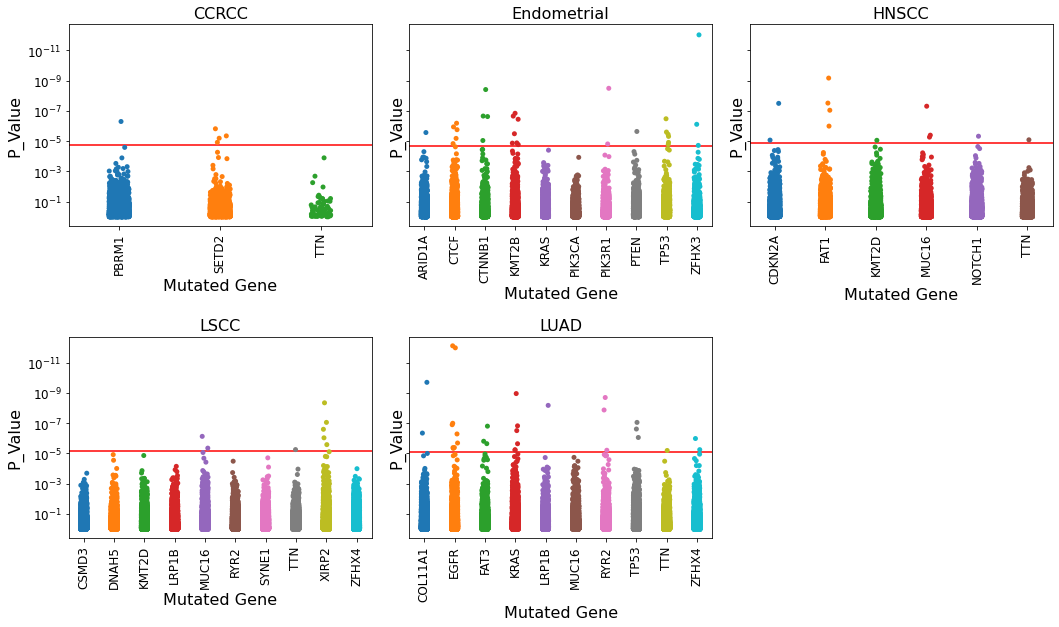

In [5]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, sharex = False, sharey = True,
                        figsize=(15,9))
cancers = list(pd.unique(trans_df.Cancer))
for ax in axes.flatten():
    if len(cancers) == 0:
        break
    cancer = cancers[0]
    cancers.remove(cancer)
    df = trans_df[trans_df.Cancer == cancer]
    plt.subplot(ax)
    #sns.violinplot(data = df, x = 'Mutated_Gene', y= 'FDR')
    sns.stripplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    #sns.swarmplot(data = df, x = 'Mutated_Gene', y= 'P_Value')
    plt.axhline(y = 0.05 / len(pd.unique(df.Gene)) , color = 'r')
    plt.title(cancer)
    plt.gca().tick_params(axis = 'x', labelrotation = 90)
    ax.set_xlabel('Mutated Gene')
ax.invert_yaxis()
ax.set_yscale('log')
fig.delaxes(axes[1][2])
fig.tight_layout()
plt.savefig('Figures/Figure 4) Transmutation Effects.png')
plt.show()
